# PROJECT TITLE:AMAZON BEST SELLER ANALYSIS

# About this Dataset

# Introduction

This research is based on the record of Amazon E-commerce data of one month. The research is conducted to find out the Best Amazon  Seller of 2021 June. The growth of E-commerce is increasing and market competitions are also high in this scenario, According Amazon wants to find out the best sellers to improve the productivity of the organization. Here I am going to explore the data of Amazon's one month that is for 2021 June.

# Attribute Information

# Importing libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Getting the data set

In [2]:
amazon = pd.read_csv("Amazon_Best_Seller_2021_June.csv")

# Data Analysis

In [3]:
#viewing data
amazon.head(5)

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99


In [4]:
#To count the unique values of each column of a dataframe.
amazon.nunique

<bound method DataFrame.nunique of            ASIN      Category  \
0    B079QHML21   Electronics   
1    B07FZ8S74R   Electronics   
2    B07XJ8C8F5   Electronics   
3    B07WVFCVJN   Electronics   
4    B08YT2N5SX   Electronics   
..          ...           ...   
702  B007DW6F34  Toys & Games   
703  B01N16VX79  Toys & Games   
704  B09197N995  Toys & Games   
705  B015CCR1FW  Toys & Games   
706  B07TS96J7Q  Toys & Games   

                                          Product Link No of Sellers Rank  \
0    https://www.amazon.com/gp/offer-listing/B079QH...     1 Sellers   #1   
1    https://www.amazon.com/gp/offer-listing/B07FZ8...     1 Sellers   #2   
2    https://www.amazon.com/gp/offer-listing/B07XJ8...     1 Sellers   #3   
3    https://www.amazon.com/gp/offer-listing/B07WVF...    27 Sellers   #4   
4    https://www.amazon.com/gp/offer-listing/B08YT2...     1 Sellers   #5   
..                                                 ...           ...  ...   
702  https://www.amazon.com/g

In [5]:
#Checking info
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           707 non-null    object 
 1   Category       707 non-null    object 
 2   Product Link   707 non-null    object 
 3   No of Sellers  707 non-null    object 
 4   Rank           707 non-null    object 
 5   Rating         707 non-null    float64
 6   Reviews Count  707 non-null    object 
 7   Price          707 non-null    object 
dtypes: float64(1), object(7)
memory usage: 44.3+ KB


In [6]:
#Checking shape or dimension.
amazon.shape

(707, 8)

In [7]:
#Viewing descriptive statistics
amazon.describe()

,Rating
count,707.000000
mean,4.593494
std,0.284117
min,1.400000
25%,4.500000
50%,4.700000
75%,4.800000
max,5.000000


In [8]:
#Checking for Null Values
amazon.isnull().sum()

ASIN             0
Category         0
Product Link     0
No of Sellers    0
Rank             0
Rating           0
Reviews Count    0
Price            0
dtype: int64

# Dropping unwanted columns

In [9]:
amazon=amazon.drop("ASIN",axis=1)

In [10]:
amazon = amazon.drop(['Product Link'], axis=1)

In [11]:
amazon

,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,Electronics,1 Sellers,#1,4.7,"640,721",$39.99
1,Electronics,1 Sellers,#2,4.7,"854,114",$34.99
2,Electronics,1 Sellers,#3,4.7,"267,821",$44.99
3,Electronics,27 Sellers,#4,4.8,"114,267",$28.48
4,Electronics,1 Sellers,#5,4.7,"267,821",$49.99
...,...,...,...,...,...,...
702,Toys & Games,10 Sellers,#95,4.6,"8,795",$6.99
703,Toys & Games,5 Sellers,#96,4.7,649,$16.99
704,Toys & Games,1 Sellers,#97,4.8,"9,121",$8.99
705,Toys & Games,26 Sellers,#98,4.7,"18,449",$19.99


# Replacing the special charaters and assigning the datatypes

In [12]:
amazon["Reviews Count"]= amazon["Reviews Count"].str.replace(',', '').astype(float).astype(int)

In [13]:
amazon["Price"]=amazon.Price.str.replace("$","").astype(float)

<ipython-input-13-560f70c8d6d9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  amazon["Price"]=amazon.Price.str.replace("$","").astype(float)


In [14]:
amazon["Rank"]=amazon.Rank.str.replace("#","").astype(int)

In [15]:
amazon["No of Sellers"]= amazon["No of Sellers"].str.replace('Sellers', '').astype(int)

In [16]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       707 non-null    object 
 1   No of Sellers  707 non-null    int32  
 2   Rank           707 non-null    int32  
 3   Rating         707 non-null    float64
 4   Reviews Count  707 non-null    int32  
 5   Price          707 non-null    float64
dtypes: float64(2), int32(3), object(1)
memory usage: 25.0+ KB


# Convertion of datatype object into a numeric value

In [17]:
amazon['Category'].unique()

array(['Electronics', 'Clothing, Shoes & Jewelry', 'Gift Cards', 'Books',
       'Video Games', 'Camera & Photo', 'Toys & Games'], dtype=object)

In [18]:
amazon["Category"].value_counts().sort_values(ascending=False)

Electronics                  147
Camera & Photo               100
Clothing, Shoes & Jewelry    100
Gift Cards                   100
Toys & Games                  95
Video Games                   95
Books                         70
Name: Category, dtype: int64

In [19]:
category_dict = {'Electronics':0, 'Clothing, Shoes & Jewelry':1, 'Gift Cards':2, 'Books':3,
       'Video Games':4, 'Camera & Photo':5, 'Toys & Games':6}
amazon['Category'] = amazon['Category'].map(category_dict)

In [20]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       707 non-null    int64  
 1   No of Sellers  707 non-null    int32  
 2   Rank           707 non-null    int32  
 3   Rating         707 non-null    float64
 4   Reviews Count  707 non-null    int32  
 5   Price          707 non-null    float64
dtypes: float64(2), int32(3), int64(1)
memory usage: 25.0 KB


Now every features is converted into a numeric value as float64 and int32.

# Data Visualizations

In [21]:
amazon

,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,0,1,1,4.7,640721,39.99
1,0,1,2,4.7,854114,34.99
2,0,1,3,4.7,267821,44.99
3,0,27,4,4.8,114267,28.48
4,0,1,5,4.7,267821,49.99
...,...,...,...,...,...,...
702,6,10,95,4.6,8795,6.99
703,6,5,96,4.7,649,16.99
704,6,1,97,4.8,9121,8.99
705,6,26,98,4.7,18449,19.99


# 1.1 Category

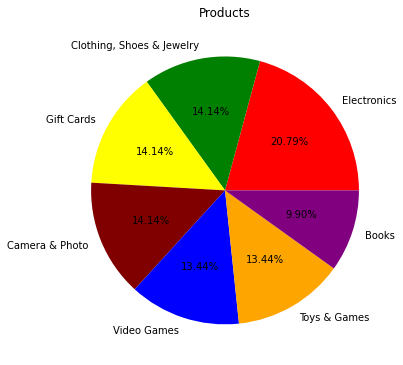

In [22]:
x= amazon["Category"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6,84))
plt.pie(x,colors= ["red","green","yellow","maroon","blue","orange","purple"],labels=["Electronics","Clothing, Shoes & Jewelry","Gift Cards","Camera & Photo","Video Games","Toys & Games","Books"],autopct = "%0.2f%%")
plt.title("Products")
plt.show()

The sellers having similar quantity of products in the given category except the seller who can sell only having 9.90 percentage books to sell . Intertesting factor is that the sellers who is having huge amount of Electonics items with 20.79 percentage.

# 1.2 No Of Sellers

In [23]:
amazon['No of Sellers'].value_counts().sort_values(ascending=False)

1      382
2       66
4       35
3       32
5       28
      ... 
146      1
172      1
42       1
41       1
33       1
Name: No of Sellers, Length: 61, dtype: int64

In [24]:
amazon['No of Sellers'].unique()

array([  1,  27,  67,  32,   9,  63,  21,   6,  19,  51,  36,   2,  10,
         3,  16,  37,   7,  15,   4,   5,  25,  17,  12,  14,   8,  23,
        18,  77,  33,  11,  59, 172,  85,  43,  42,  56,  41, 214,  20,
        13,  22, 146,  95,  60,  52,  49, 110,  29,  68,  53,  94,  50,
        24,  55,  54, 108, 122,  83,  34,  45,  26])

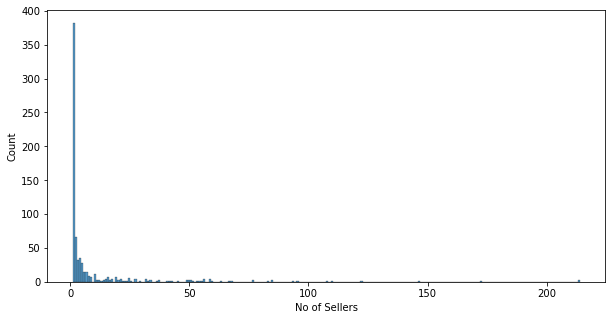

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(amazon['No of Sellers'])
plt.show()

Very interesting to see that products sold by 1 seller make up the majority of the dataset

# 1.3 Rank

In [47]:
amazon['Rank'].value_counts().sort_values(ascending=False)

75    8
64    8
71    8
54    8
96    8
     ..
84    6
37    6
3     6
44    6
22    5
Name: Rank, Length: 100, dtype: int64

In [48]:
amazon['Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100,  11,  84])

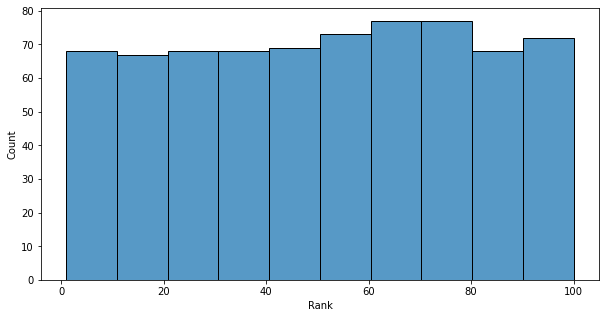

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(amazon['Rank'],bins=10)
plt.show()

Comparatively every count of rank looking similar except the ranks 60 to 80 with a count of 75.

# 1.4 Rating

In [29]:
amazon['Rating'].unique()

array([4.7, 4.8, 4.6, 4.5, 4.4, 4. , 4.9, 5. , 4.2, 4.3, 4.1, 3.5, 3.8,
       3.3, 1.4, 3.9, 2.7, 3.6, 3.4])

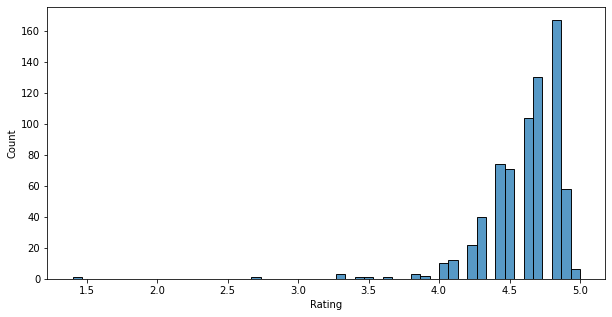

4.8    167
4.7    130
4.6    104
4.4     74
4.5     71
4.9     58
4.3     40
4.2     22
4.1     12
4.0     10
5.0      6
3.3      3
3.8      3
3.9      2
3.6      1
3.4      1
1.4      1
3.5      1
2.7      1
Name: Rating, dtype: int64

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(amazon['Rating'])
plt.show()

amazon['Rating'].value_counts().sort_values(ascending=False)

The increase of rating in trend is between 4.0 and 4.8, but the stimulation is from 4.6 to 4.8. From the above, I can conclude that the rating of 4.8 has 167 counts with the highest position.

# 1.5 Reviews Count

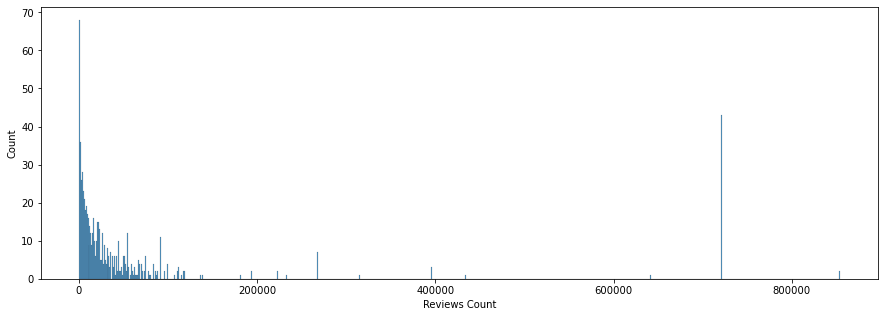

721690    39
91384     11
54100     11
267821     7
1228       6
          ..
3940       1
4092       1
5117       1
434174     1
4095       1
Name: Reviews Count, Length: 546, dtype: int64

In [61]:
plt.figure(figsize=(15,5))
sns.histplot(amazon['Reviews Count'],bins=800)
plt.show()

amazon['Reviews Count'].value_counts().sort_values(ascending=False)

In [66]:
amazon['Reviews Count'].describe()

count       707.000000
mean      77005.942008
std      178407.465321
min           1.000000
25%        5138.000000
50%       18023.000000
75%       49593.500000
max      854114.000000
Name: Reviews Count, dtype: float64

The result showing that the Reviews Count has the maximum amount of count with 854114 which is starts from 1, hence we can consider the count means of 77005.94. as a proper value.

# 1.6 Price

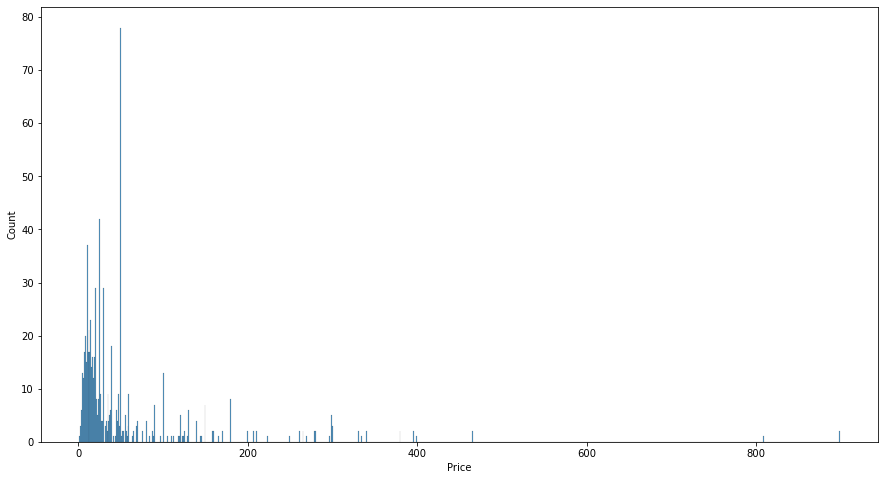

50.00     62
25.00     26
29.99     20
19.99     16
39.99     15
          ..
17.40      1
808.29     1
12.98      1
2.95       1
12.29      1
Name: Price, Length: 287, dtype: int64

In [71]:
plt.figure(figsize=(15,8))
sns.histplot(amazon['Price'],bins=800)
plt.show()

amazon['Price'].value_counts().sort_values(ascending=False)

In [67]:
amazon['Price'].describe()

count    707.000000
mean      55.686351
std       88.580862
min        0.880000
25%       13.990000
50%       25.990000
75%       50.000000
max      899.000000
Name: Price, dtype: float64

The histogram conveying that the minimum and maximum price of the product is 0.88 and 899 respectively with a mean value of 55.68. Most of the pricing has happened between 0 and 100.

# 1.7 Rating with Category

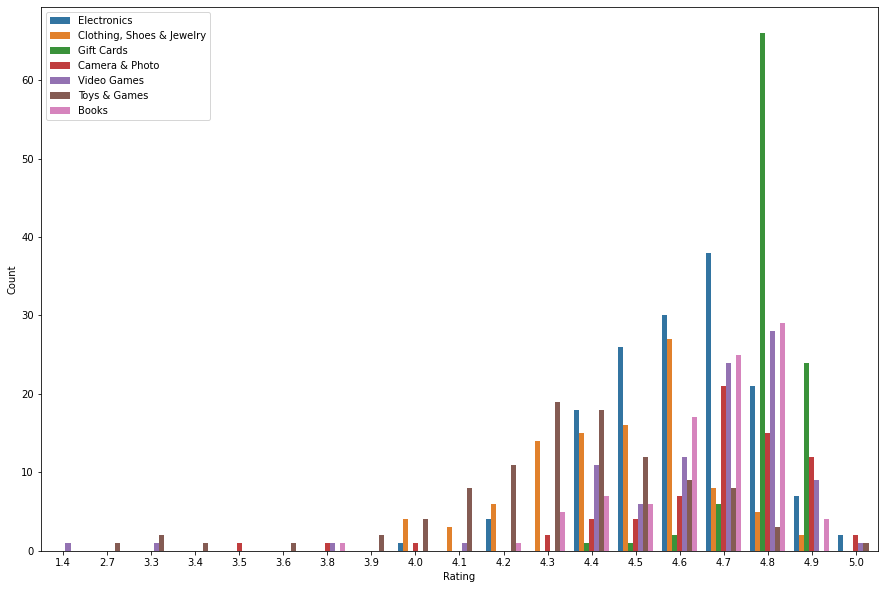

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x="Rating",hue="Category",data=amazon)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(loc="upper left",labels=["Electronics","Clothing, Shoes & Jewelry","Gift Cards","Camera & Photo","Video Games","Toys & Games","Books"])
plt.show()

The real stimulation of rating with the category begins from 4.0 and ends on 5.0. The count plot says that the rating has mostly happened in 4.8 with the best rating in the category of Gift cards.

# 1.8 Category with Reviews Count

In [72]:
px.bar(y='Reviews Count', x='Category', data_frame=amazon)

{'Electronics':0, 'Clothing, Shoes & Jewelry':1, 'Gift Cards':2, 'Books':3,'Video Games':4, 'Camera & Photo':5, 'Toys & Games':6}

From the bar plot, we can see that the category with Gift cards has more reviews count compared to others.

# 2.1 Correlation Plot

,Category,No of Sellers,Rank,Rating,Reviews Count,Price
Category,1.000000,0.165406,-0.083368,-0.099692,-0.194775,-0.287085
No of Sellers,0.165406,1.000000,0.003025,0.107523,-0.097749,0.125485
Rank,-0.083368,0.003025,1.000000,-0.040416,-0.119950,0.121938
Rating,-0.099692,0.107523,-0.040416,1.000000,0.218048,0.026729
Reviews Count,-0.194775,-0.097749,-0.119950,0.218048,1.000000,-0.020218
Price,-0.287085,0.125485,0.121938,0.026729,-0.020218,1.000000


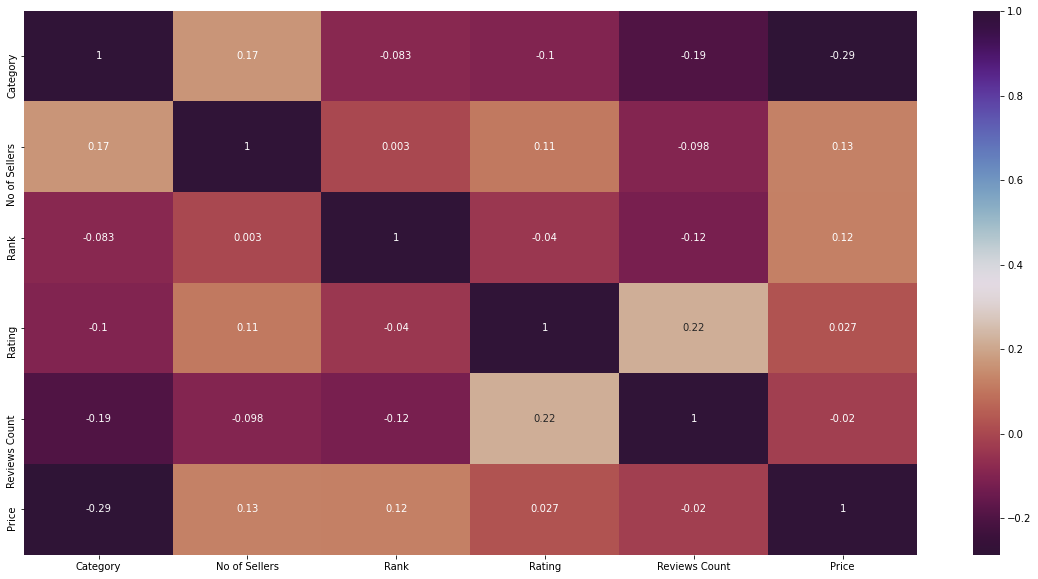

In [36]:
plt.figure(figsize=(20,10))
c= amazon.corr()
sns.heatmap(c,cmap='twilight_shifted_r',annot=True)
c

Not too much correlation in the dataset. The highest correlation for rating is reviews count. The correlation for no of sellers is category and rating and there are slight correlation for price with no of sellers and rank. Hence, we can see in the heatmap there is no ideal correlation. To extract from deep we can use scatter plot.

# 2.2 Rating Vs Reviews Count 

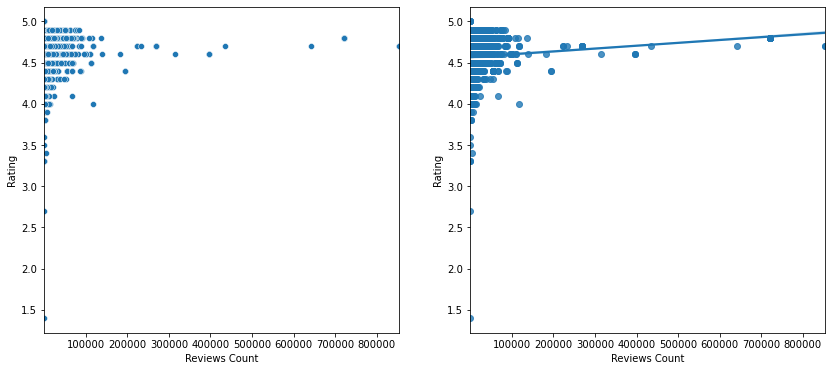

In [73]:
fig,axes=plt.subplots(1,2,sharex=True,figsize=(14,6))
sns.scatterplot(ax=axes[0],x=amazon["Reviews Count"],y=amazon["Rating"])
sns.regplot(ax=axes[1],x=amazon["Reviews Count"],y=amazon["Rating"])
plt.show()

As you can see from the scatter plot and the trend line which is showing some relationship between the rating from customers and the reviews count.

# 2.3 No of Sellers Vs Category

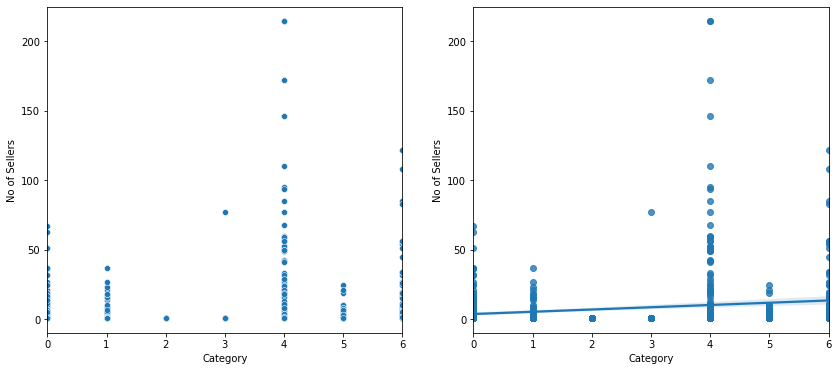

In [74]:
fig,axes=plt.subplots(1,2,sharex=True,figsize=(14,6))
sns.scatterplot(ax=axes[0],x=amazon["Category"],y=amazon["No of Sellers"])
sns.regplot(ax=axes[1],x=amazon["Category"],y=amazon["No of Sellers"])
plt.show()

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between no of sellers and category.

# 2.4 No of Sellers Vs Rating 

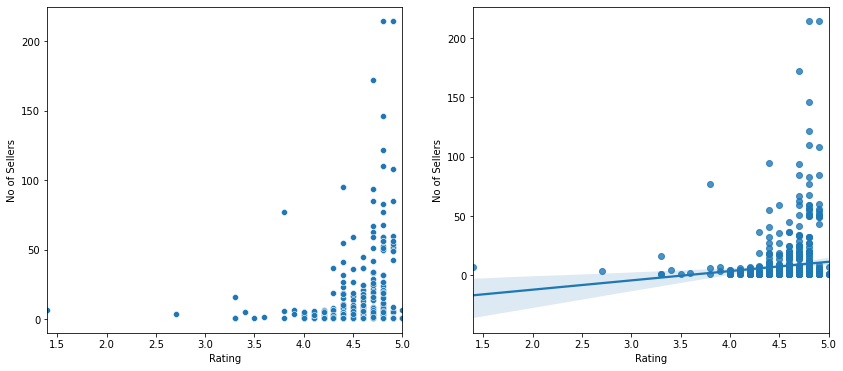

In [75]:
fig,axes=plt.subplots(1,2,sharex=True,figsize=(14,6))
sns.scatterplot(ax=axes[0],x=amazon["Rating"],y=amazon["No of Sellers"])
sns.regplot(ax=axes[1],x=amazon["Rating"],y=amazon["No of Sellers"])
plt.show()

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between no of sellers and rating.

# 2.5 Price Vs No of Sellers

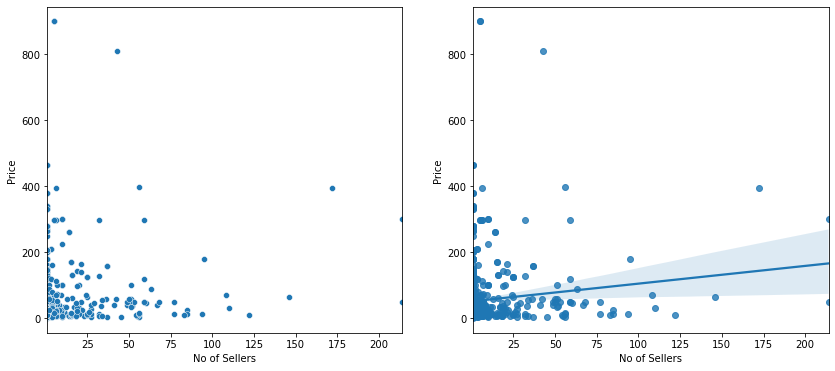

In [43]:
fig,axes=plt.subplots(1,2,sharex=True,figsize=(14,6))
sns.scatterplot(ax=axes[0],x=amazon["No of Sellers"],y=amazon["Price"])
sns.regplot(ax=axes[1],x=amazon["No of Sellers"],y=amazon["Price"])
plt.show()

As you can see from the scatter plot and the trend line which is showing that there is no relationship between price and no of sellers.

# 2.6 Price Vs Rank 

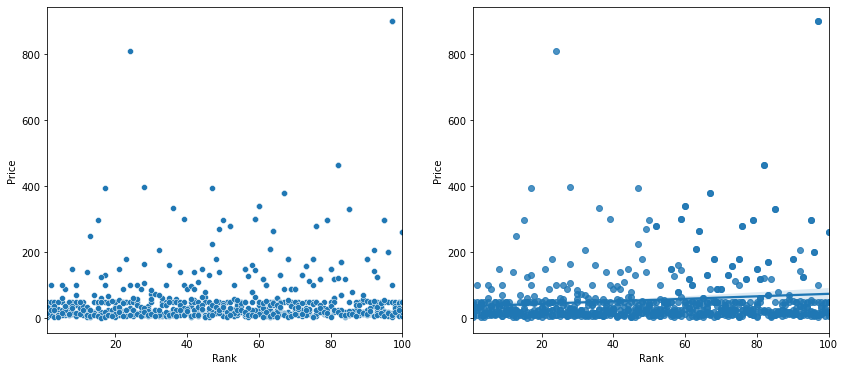

In [45]:
fig,axes=plt.subplots(1,2,sharex=True,figsize=(14,6))
sns.scatterplot(ax=axes[0],x=amazon["Rank"],y=amazon["Price"])
sns.regplot(ax=axes[1],x=amazon["Rank"],y=amazon["Price"])
plt.show()

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between price and rank.

# Conclusion

From the study we can convey only the overall performance of the sellers, we can't take individually, Because of the some limitations in the data. The dataset is incomplete with limited number of columns and rows.

Intertesting factor is that the sellers with Electonics sold highest amount of items. Amazon can consider sellers with electronics providing the best productivity for the organization.

Also Amazon have to boost the performance of other sellers for better productivity and goodwillof the organization.

Here we can conclude that the rating is best at its optimum level of 4.8 with the highest position.

In the case of reviews count we can consider the best in average value of 77005.94.

Must have to consider an ideal pricing.

The rating has mostly happened in 4.8 with the best rating in the category of Gift cards and the category with Gift cards has more reviews count compared to others.

Hence Amazon must have to focus on other categories also.

Not too much correlation in the dataset. The highest correlation for rating is reviews count. The correlation for no of sellers is category and rating and there are slight correlation for price with no of sellers and rank. Hence, we can see in the heatmap there is no ideal correlation.